In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('q1 raw_data.csv')
df

,Height (Inches),Weight (Pounds),Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [29]:
df.columns=['Height', 'Weight', 'Age', 'Grip Strength','Frailty']
df.columns
df['Frailty'].replace(['Y', 'N'], [1, 0], inplace=True)
df

<ipython-input-29-14653f4687ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Frailty'].replace(['Y', 'N'], [1, 0], inplace=True)
<ipython-input-29-14653f4687ba>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Frailty'].replace(['Y', 'N'], [1, 0], inplace=True)


,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1
5,68.7,123,50,26,0
6,69.8,141,51,22,1
7,70.1,136,23,20,1
8,67.9,112,17,19,0
9,66.8,120,39,31,0


In [30]:
df.to_csv('Q1_clean.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)

In [31]:
df

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1
5,68.7,123,50,26,0
6,69.8,141,51,22,1
7,70.1,136,23,20,1
8,67.9,112,17,19,0
9,66.8,120,39,31,0


In [32]:
from scipy.stats import ttest_ind
# Separate Grip Strength based on Frailty status
# Accessing using the correct column name 'Grip Strength'
frail_grip_strength = df[df['Frailty'] == 1]['Grip Strength']
non_frail_grip_strength = df[df['Frailty'] == 0]['Grip Strength']
grip_strength_ttest = ttest_ind(frail_grip_strength, non_frail_grip_strength, equal_var=False)
print("T-Test results for Grip Strength between Frail and Non-Frail Participants:")

print("T-Statistic:", grip_strength_ttest.statistic)
print("P-Value:", grip_strength_ttest.pvalue)

T-Test results for Grip Strength between Frail and Non-Frail Participants:
T-Statistic: -1.6349999934600006
P-Value: 0.1415730416628566


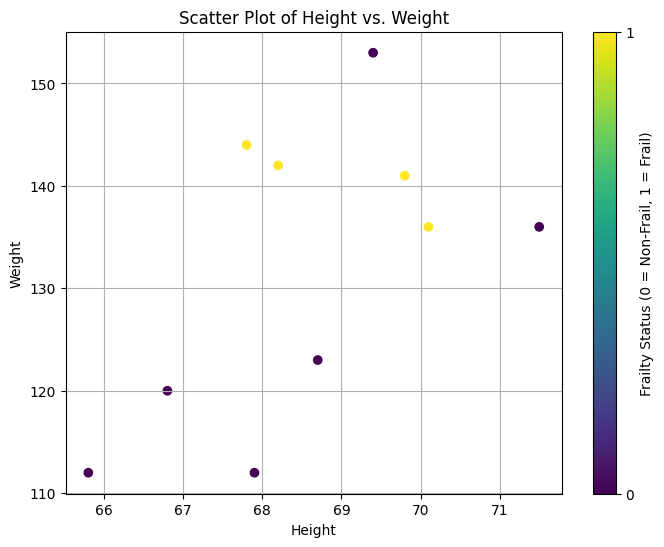

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Weight'], c=df['Frailty'])
plt.colorbar(ticks=[0, 1], label='Frailty Status (0 = Non-Frail, 1 = Frail)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs. Weight')
plt.grid(True)
plt.show()

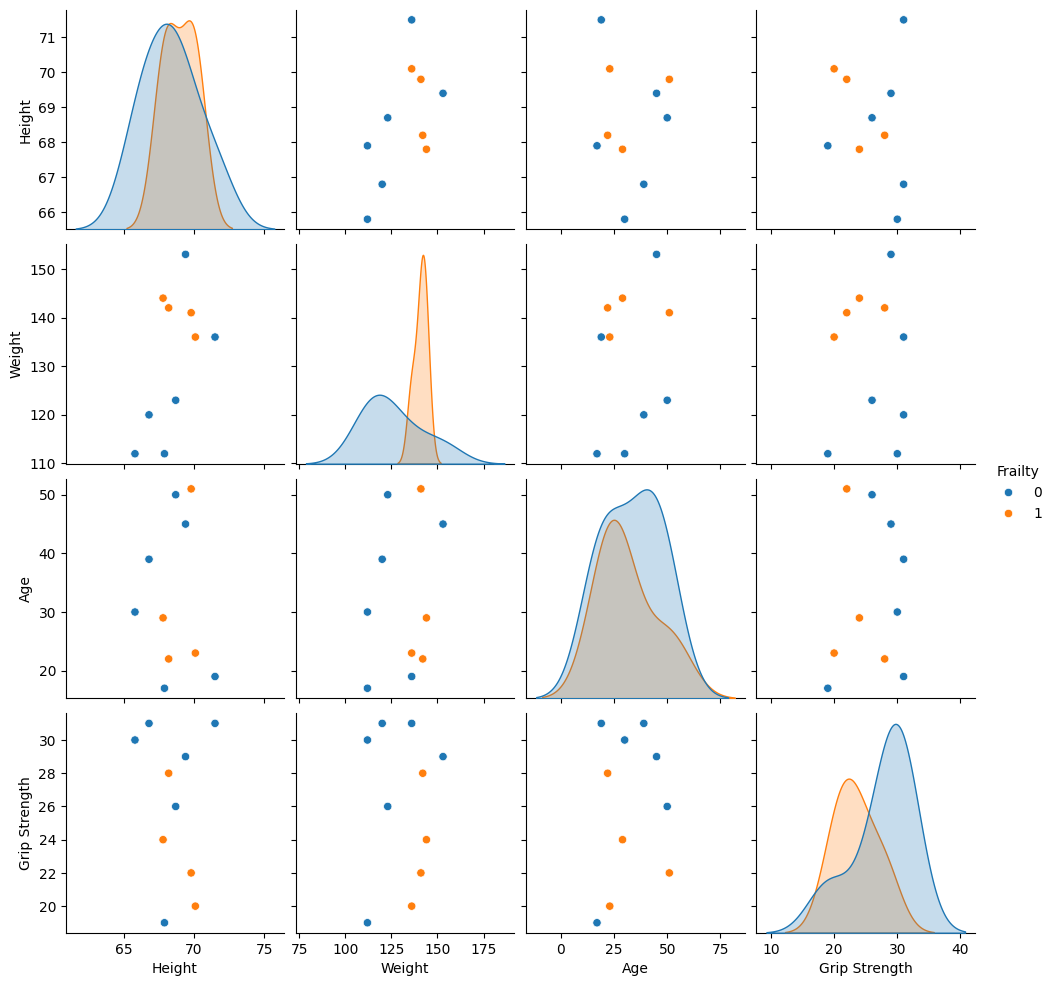

In [34]:
sns.pairplot(df, hue="Frailty")
plt.show()